In [249]:
import pandas as pd
import numpy as np
data_frame=pd.read_excel("data150（人工智能数值类）.xls")
data_array=data_frame.values
X_data=data_array[:,1:10]
Y_data=data_array[:,11]
print(X_data.shape)
print(Y_data.shape)

(150, 9)
(150,)


In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)
print(X_train[0])
print(X_test[0])

[-1.38175011  1.1889465  -0.19668864 -0.42327314  0.46867149  0.62135256
 -1.22675225  0.32989877  0.57520302]
[-0.65166227 -0.38266778 -0.17767878  0.44665239  0.4260908   0.62273461
 -1.3042393  -0.66506817  0.08242785]


In [274]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(Y_pred)

[2.45109696 2.49342219 2.36697678 2.35487113 2.39324458 2.49774143
 2.54296776 2.36517373 2.50618377 2.41639073 2.34910362 2.54620424
 2.40044668 2.65044855 2.49607096 2.33291559 2.40686273 2.48617412
 2.35546203 2.40353764 2.4897997  2.40102896 2.47067376 2.39218701
 2.39680678 2.3560713  2.28604001 2.36809832 2.46567458 2.49767168
 2.48888226 2.50723687 2.54458541 2.58095234 2.42522086 2.34258197
 2.43113859 2.47405574 2.66869944 2.49781119 2.36663602 2.4267034
 2.41510872 2.50263198 2.61570044]


MSE: 0.010730598480313125
R^2: 0.5154259824934877


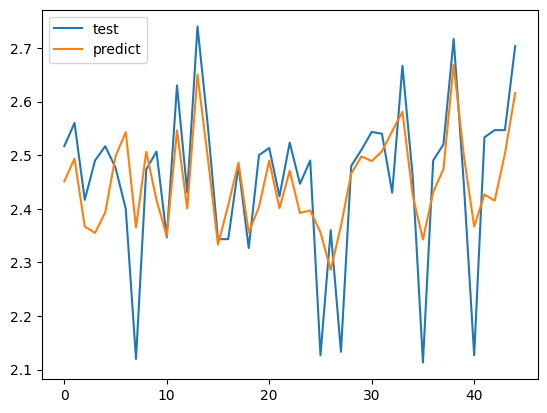

In [275]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:",mean_squared_error(Y_test, Y_pred))
print("R^2:",r2_score(Y_test, Y_pred))
X=range(0,45)
plt.plot(X,Y_test, label='test')
plt.plot(X, Y_pred, label='predict')
plt.legend()
plt.show()

In [253]:
X_k=model.coef_#得到模型斜率
X_b=model.intercept_#得到模型截距
print(X_k)
print(X_b)

[-0.02039217 -0.02380072 -0.03199078  0.0467218  -0.01859704  0.00930802
  0.02861808  0.00886494  0.01351688]
2.446381950362378


[-0.02045179 -0.02379773 -0.03196928  0.04672476 -0.01858323  0.00929544
  0.02863661  0.00893825  0.01346576  2.44638113]


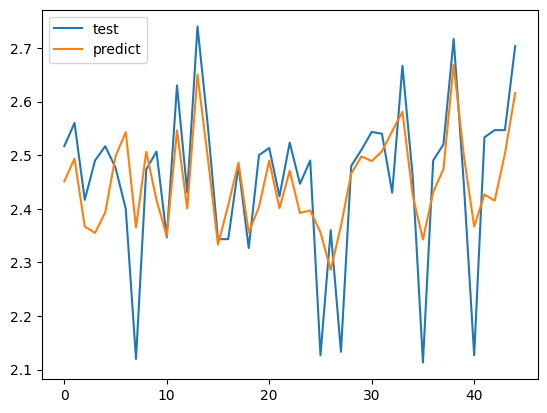

MSE: 0.010730598480313124
R^2: 0.5154259824934877


In [254]:
X_train_added=np.append(X_train,np.ones((X_train.shape[0],1)),axis=1)#在训练集每组数据末尾添加一个1，这样乘出来结果对应正好是加截距
X_test_added=np.append(X_test,np.ones((X_test.shape[0],1)),axis=1)
theta_1 = np.array([10,10,10,10,10,10,10,10,10,10])
n=0.01
iteration=1000
m=10
for i in range(iteration):
    error=np.dot(X_train_added,theta_1)-Y_train
    grad=(1/m)*np.dot(X_train_added.T,error)
    theta_1=theta_1-n*grad
print(theta_1)
Y_pred_grad_1=np.dot(X_test_added,theta)
plt.plot(X,Y_test, label='test')
plt.plot(X,Y_pred_grad_1, label='predict')
plt.legend()
plt.show()
print("MSE:",mean_squared_error(Y_test, Y_pred_grad_1))
print("R^2:",r2_score(Y_test, Y_pred_grad_1))

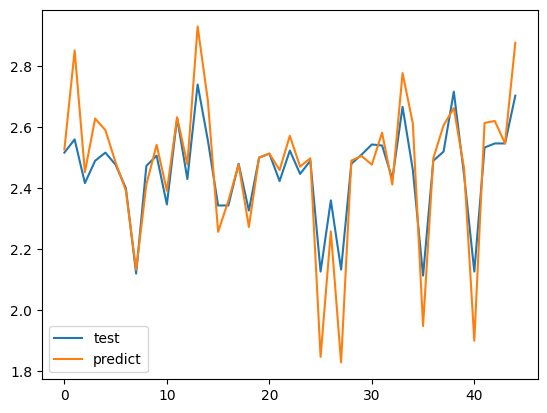

最高次为 2 的均方误差 0.012086309894985587
最高次为 2 的R方系数 0.45420455779918645


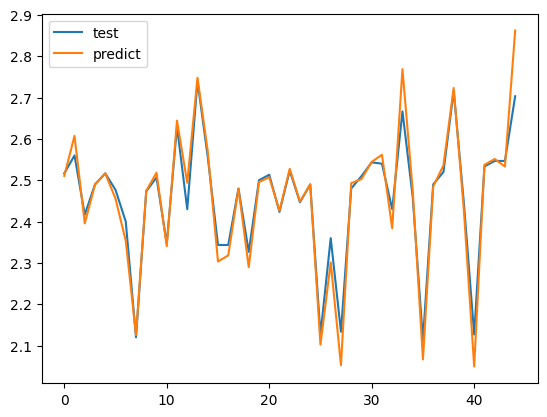

最高次为 3 的均方误差 0.0016066856846455465
最高次为 3 的R方系数 0.9274450405998068


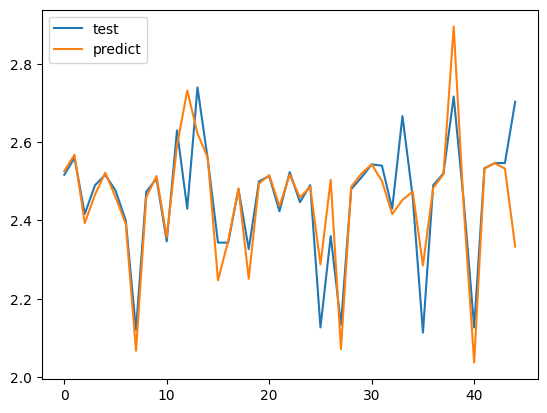

最高次为 4 的均方误差 0.009605205852332306
最高次为 4 的R方系数 0.5662466359745937


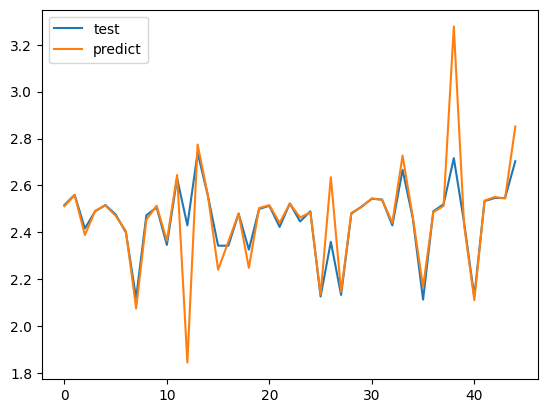

最高次为 5 的均方误差 0.017429179057114007
最高次为 5 的R方系数 0.2129304499612914


In [255]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
for i in range(2,6):
    poly = PolynomialFeatures(degree=i)
    line=LinearRegression()
    model_2=make_pipeline(poly, line)
    model_2.fit(X_train, Y_train)
    Y_pred_poly=model_2.predict(X_test)
    plt.plot(X,Y_test, label='test')
    plt.plot(X,Y_pred_poly, label='predict')
    plt.legend()
    plt.show()
    print("最高次为",i,"的均方误差",mean_squared_error(Y_test, Y_pred_poly))
    print("最高次为",i,"的R方系数",r2_score(Y_test, Y_pred_poly))


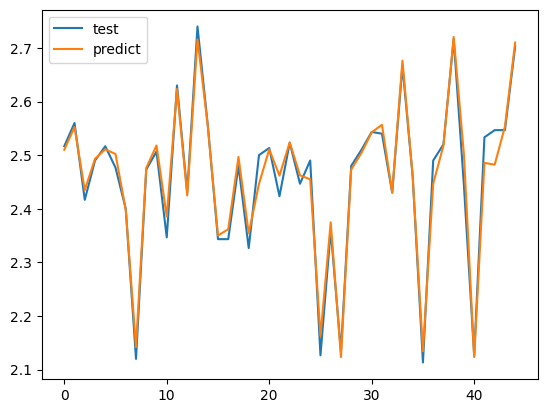

所用核函数为： rbf
MSE: 0.0005647575231538242
R^2: 0.9744965928588458


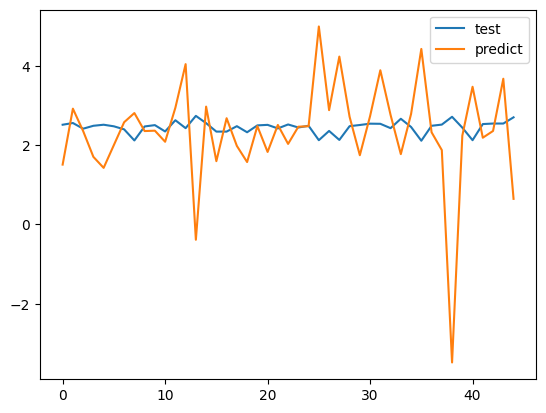

所用核函数为： sigmoid
MSE: 1.928650432555574
R^2: -86.09429303349125


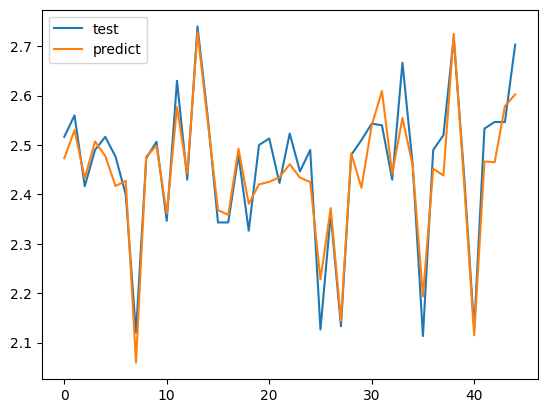

所用核函数为： poly
MSE: 0.0026064339965357875
R^2: 0.8822982524801314


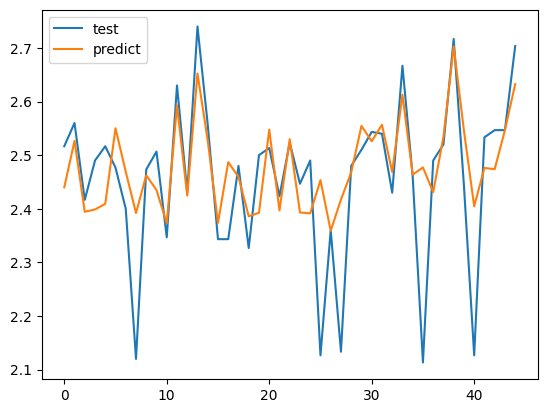

所用核函数为： linear
MSE: 0.013578828572868804
R^2: 0.38680516965953504


In [273]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
scaler = StandardScaler()#数据归一化
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for i in ['rbf','sigmoid','poly','linear']:
    model_3 = SVR(kernel=i, C=1.0, epsilon=0.001)
    model_3.fit(X_train_scaled, Y_train)
    Y_pred_svr = model_3.predict(X_test_scaled)
    plt.plot(X,Y_test, label='test')
    plt.plot(X,Y_pred_svr, label='predict')
    plt.legend()
    plt.show()
    print("所用核函数为：",i)
    print("MSE:",mean_squared_error(Y_test, Y_pred_svr))
    print("R^2:",r2_score(Y_test, Y_pred_svr))